In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

p28 Questions

1. What's the similarity and difference between:
    
    a) a long call and a short put?
    
    Similarity: 
    - **both holders are bullish**

   Difference:
    - lc pays premium
    - sp receives premium
    - lc max profit = unlimited
    - sp max profit = premium
    - lc max loss = premium
    - sp max loss = unlimited
    - **sp is riskier**
    
   b) a long put and a short call?
    
    Similarity: 
    - **both holders are bearish**

   Difference:
    - lp pays premium
    - sc receives premium
    - lp max profit = unlimited
    - sc max profit = premium
    - lp max loss = premium
    - sc max loss = unlimited
    - **sc is riskier**
    
**shorts are always riskier**

2. A lc provides downside protection, while a lp provides upside protection. True or False? Why?

Lp provides downside protection acting as a stop-loss at strike level (minus premium, ie breakeven point). Lc holder will exit at breakeven point, which might be higher than the market. Lc provides upside protection - via purchasing a right to enter long position in underlying at a stike (plus premium, breakeven), which might be lower than the market. 

So answer is **False**, they confused the two. 

3. Boeing is currently trading at 36, and the May 35 puts are trading at 3 1/8. 

a) If you buy one if these puts at the current market price, what is your break-even level? lp_bre = strike - premium = 35 - 3.125 = 31.875

b) lp_max_gain = inf

c) lp_max_loss = premium = 3.125

d) 
   - sp_bre = lp_bre = 31.875
   - sp_max_gain = premium = 3.125
   - sp_max_loss = inf
   
e) If you sell one of these puts at the current market price, what is the potentnial effective purchase price of the stock at expiration? und_price - premium = 36 - 3.125 = 32.875

f) The multiplier for this options contract is 100. What's the cash value of one of these puts? premium * cash_mult = 3.125 * 100 = $312.5

g) If at May expiration Boeing closes at 30, what is the profit for the put buyer, and what's the loss for put seller?
    
    - lp_total_prft = (strike - und_price - premium) * cash_mult = (35 - 30 - 3.125) * 100 = 187.5
    - sp_total_loss = -lp_total_prft = -187.5 or (und_price + premium - strike) * cash_mult = (30 + 3.125 - 35) * 100

In [67]:
# profit_loss_table
def lp_pl(price, strike, premium):
    """
    Long put profit loss
    """
    if price <= strike:
        return (strike - price - premium) 
    return - premium

def lp_max_gain():
    """
    Long put maximum gain
    """
    return np.inf

def lp_max_loss(premium):
    """
    Long put maximum loss
    """
    return premium

def sp_pl(price, strike, premium):
    """
    Short put profit loss
    """
    return -lp_pl(price, strike, premium)

def sp_max_gain(premium):
    """
    Short put maximum gain
    """
    return premium

def sp_max_loss(strike, premium):
    """
    Short put maximum loss per 1 unit of underlying
    """
    return premium - strike

def put_value_at_exp(price, strike, premium):
    """
    Value of put at expiration
    """
    if price >= strike:
        return 0
    return price - strike

def put_pl(strike, premium, und_price, cash_mult, stl_price=False, plot=False, prices=None, figsize=(17,2)):
    
    # basics
    breakeven = strike - premium
    basis = strike - breakeven
    absbasis = np.abs(basis)
    print(basis)
    
    # let's be consistent for calls and puts. x-axis (prices) increase rightbound, decrease leftbound
    delta = (und_price-strike)/strike
    delta_beven = (und_price-breakeven)/breakeven
    
    cash_value = premium * cash_mult
    lp_total_prft = None
    sp_total_prft = None
    
    if stl_price is not False:
        lp_total_prft = (strike - und_price - premium) * cash_mult
        sp_total_prft = -lp_total_prft
        
    # x ticks of appropriate size - I take delta as basis to make plot visually easier
    if prices is None:
        # if price is too far to the right 
        # TODO - I need a better scaling und_price * 1.01
        end = breakeven+(absbasis*1.5) if breakeven+(absbasis*1.5) > und_price else und_price * 1.01
        if und_price <= strike:
            # let's not have negative prices
            start = 0 if und_price-(absbasis*1.5) < 0 else und_price-(absbasis*1.5)
            prices = np.arange(start, 
                               end, 
                               absbasis*.1)
        else: 
            start = 0 if strike-(absbasis*1.5) < 0 else strike-(absbasis*1.5)            
            prices = np.arange(start, 
                               end, 
                               absbasis*.1)
        
        
    long = [(price, 
             put_value_at_exp(price, strike, premium),
             lp_pl(price, strike, premium),
             lp_max_gain(),
             lp_max_loss(premium)) for price in prices]
    short = [(price, 
              put_value_at_exp(price, strike, premium),
              sp_pl(price, strike, premium),
              sp_max_gain(premium),
              sp_max_loss(strike, premium)) for price in prices]
    
    
    if plot == True:
        plt.figure(figsize=figsize)
        short_pls = [pl for (price, val, pl, maxgain, maxloss) in short]
        long_pls = [pl for (price,val,  pl, maxgain, maxloss) in long]
        plt.plot(prices, short_pls, 'r', linewidth=.75, label='short PL')
        plt.plot(prices, long_pls, 'g', linewidth=.75, label='long PL')
        plt.plot(prices, np.zeros(len(prices)), 'k--', linewidth=.75)
        plt.plot([und_price]*3, [-premium*1.5,0,premium*1.5], 'y-', linewidth=.75, label=f'price {und_price}')
        plt.plot([strike]*3, [-premium*1.5,0,premium*1.5], 'k--', linewidth=.75, label=f'strike {strike}')
        plt.legend()
        plt.xticks(rotation=45)
        locs, labels = plt.xticks(
                [prices[0], breakeven, und_price, strike, prices[-1]],
                [f'{prices[0]}', f'{breakeven}', f'{und_price}', f'{strike}', f'{prices[-1]}'])

    if stl_price == False:
        return (long, short, breakeven, delta, delta_beven, cash_value)
    return (long, short, breakeven, delta, delta_beven, cash_value, lp_total_prft, sp_total_prft)

3.125


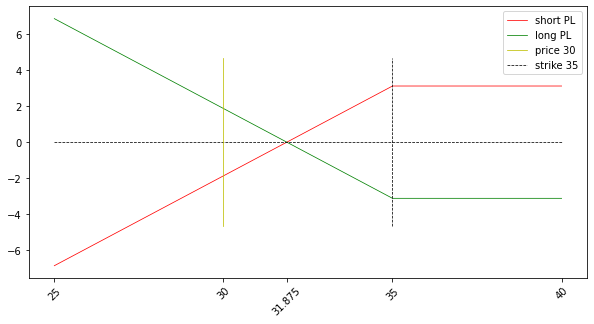

In [64]:
prices = [25, 30, 31, 31.875, 32, 33, 34, 35, 40]
curr = 30
strike = 35
premium = 3.125
cash_multiplier = 100
stl_price = 30
long, short, breakeven, delta, delta_beven, cash_value, lp_total_prft, sp_total_prft = put_pl(strike, 
                                                                                            premium, 
                                                                                            curr, 
                                                                                            cash_multiplier, 
                                                                                            stl_price, 
                                                                                            plot=True, 
                                                                                            prices=prices,
                                                                                            figsize=(10,5))
# print(long)
# print(lp_total_prft, sp_total_prft)
# print(long)
# print(delta)
# print(delta_beven)
# print(cash_value)

3.125


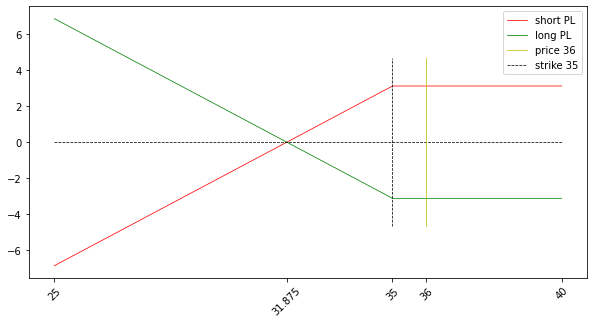

In [65]:
prices = [25, 30, 31, 31.875, 32, 33, 34, 35, 40]
curr = 36
strike = 35
premium = 3.125
cash_multiplier = 100
stl_price = 37
long, short, breakeven, delta, delta_beven, cash_value, lp_total_prft, sp_total_prft = put_pl(strike, 
                                                                                            premium, 
                                                                                            curr, 
                                                                                            cash_multiplier, 
                                                                                            stl_price, 
                                                                                            plot=True, 
                                                                                            prices=prices,
                                                                                            figsize=(10,5))
# print(long)
# print(lp_total_prft, sp_total_prft)
# print(long)
# print(delta)
# print(delta_beven)
# print(cash_value)


3.25


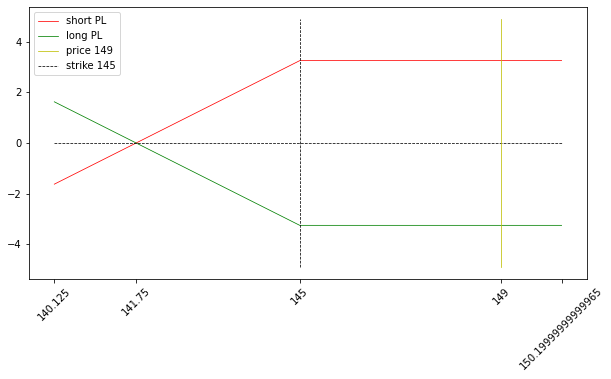

In [68]:
# 4 IBM
prices = [25, 30, 31, 31.875, 32, 33, 34, 35, 40]
curr = 149
strike = 145
premium = 3.25
cash_multiplier = 100
stl_price = 135
long, short, breakeven, delta, delta_beven, cash_value, lp_total_prft, sp_total_prft = put_pl(strike, 
                                                                                            premium, 
                                                                                            curr, 
                                                                                            cash_multiplier, 
                                                                                            stl_price, 
                                                                                            plot=True, 
#                                                                                             prices=prices,
                                                                                            figsize=(10,5))
# print(long)
# print(lp_total_prft, sp_total_prft)
# print(long)
# print(delta)
# print(delta_beven)
# print(cash_value)